In [1]:
import os
import random 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('..')

In [3]:
from model.img_generator import DataGenerator2D
from preprocessing.get_ct_scan_information import build_train_test_df

In [4]:
data_path_source_dir = os.path.join('ml4h_proj1_colon_cancer_ct')

# Let's check the imbalance in the data

In [5]:
random.seed(123)
np.random.seed(123)

Let's choose a set of images that have cancer labeled in them 

In [6]:
tr_df, x_ts_df = build_train_test_df(data_path_source_dir)

In [7]:
cancer_pixels_df = pd.read_pickle('cancer_pixels_df')
cancer_pixels_df.reset_index(inplace=True)

In [8]:
cancer_pixels_df['index'] = cancer_pixels_df.image_name.map(lambda str_: str_.split('.nii.gz')[0].split('colon_')[1])

In [9]:
tr_df_only_cancer = cancer_pixels_df.set_index(['index', 'depth_i'])[['cancer_pixel_area']].join(tr_df, how='inner')

In [10]:
tr_df_only_cancer

cancer_pixel_area  \
index depth_i                      
001   51                   841.0   
      52                   646.0   
      53                   296.0   
005   44                   278.0   
      50                   270.0   
...                          ...   
169   139                  245.0   
      140                  228.0   
      141                  198.0   
      142                  153.0   
      143                  131.0   

                                                   x_tr_img_path  depth  \
index depth_i                                                             
001   51       ml4h_proj1_colon_cancer_ct\imagesTr\colon_001....     60   
      52       ml4h_proj1_colon_cancer_ct\imagesTr\colon_001....     60   
      53       ml4h_proj1_colon_cancer_ct\imagesTr\colon_001....     60   
005   44       ml4h_proj1_colon_cancer_ct\imagesTr\colon_005....     98   
      50       ml4h_proj1_colon_cancer_ct\imagesTr\colon_005....     98   
...                                                          ...    ...   
169   139      ml4h_proj1_colon_cancer_ct\imagesTr\colon_169....    258   
      140      ml4h_proj1_colon_cancer_ct\imagesTr\colon_169....    258   
      141      ml4h_proj1_colon_cancer_ct\imagesTr\colon_169....    258   
      142      ml4h_proj1_colon_cancer_ct\imagesTr\colon_169....    258   
      143      ml4h_proj1_colon_cancer_ct\imagesTr\colon_169....    258   

                                                   y_tr_img_path  
index depth_i                                                     
001   51       ml4h_proj1_colon_cancer_ct\labelsTr\colon_001....  
      52       ml4h_proj1_colon_cancer_ct\labelsTr\colon_001....  
      53       ml4h_proj1_colon_cancer_ct\labelsTr\colon_001....  
005   44       ml4h_proj1_colon_cancer_ct\labelsTr\colon_005....  
      50       ml4h_proj1_colon_cancer_ct\labelsTr\colon_005....  
...                                                          ...  
169   139      ml4h_proj1_colon_cancer_ct\labelsTr\colon_169....  
      140      ml4h_proj1_colon_cancer_ct\labelsTr\colon_169....  
      141      ml4h_proj1_colon_cancer_ct\labelsTr\colon_169....  
      142      ml4h_proj1_colon_cancer_ct\labelsTr\colon_169....  
      143      ml4h_proj1_colon_cancer_ct\labelsTr\colon_169....  

[1034 rows x 4 columns]

## Distribution of images that have cancer pixels

In [11]:
a = tr_df.join(tr_df_only_cancer.groupby(level=0)['cancer_pixel_area'].count().rename('cancer_cut_counts'))

<AxesSubplot:ylabel='Frequency'>

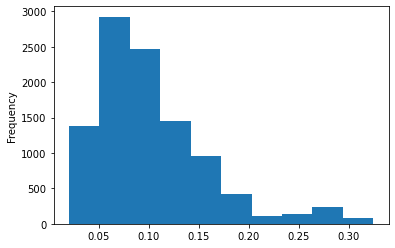

In [12]:
(a['cancer_cut_counts']/a['depth']).plot.hist()

In [13]:
(a['cancer_cut_counts']/a['depth']).mean()

0.10175162369612281

In [14]:
(a['cancer_cut_counts']/a['depth']).median()

0.08888888888888889

In [15]:
(a['cancer_cut_counts']/a['depth']).quantile([0.25, 0.5, 0.75, 0.95, 0.99])

0.25    0.063415
0.50    0.088889
0.75    0.129032
0.95    0.215686
0.99    0.283019
dtype: float64

A very very big portion of them have cancer pixels in only 20% of the transversal cuts. Let's check pixel percentage wise over all the image but it's not looking too promising  

## Relative frequency of cancer pixels 

In [16]:
import nibabel as nib

In [17]:
percentage_cancer_pixels = list()
for img_path in tr_df.y_tr_img_path.unique():
    img_i = nib.load(img_path).get_data()
    percentage_cancer_pixels.append(img_i.sum()/(img_i.shape[0]*img_i.shape[1]*img_i.shape[2]))

ml4h_proj1_colon_cancer_ct\labelsTr\colon_001.nii.gz


C:\Users\Juan Diego\anaconda3\envs\Project_1\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


ml4h_proj1_colon_cancer_ct\labelsTr\colon_005.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_006.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_007.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_008.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_009.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_011.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_012.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_015.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_022.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_024.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_025.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_026.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_027.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_028.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_029.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_030.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_031.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_032.nii.gz
ml4h_proj1_colon_cancer_ct\labelsTr\colon_033.

In [25]:
pd.DataFrame(percentage_cancer_pixels)

,0
0,0.000113
1,0.000592
2,0.000067
3,0.000237
4,0.000224
...,...
95,0.000152
96,0.000050
97,0.001540
98,0.000219


In [19]:
np.mean(percentage_cancer_pixels)

0.0005996856643402784

In [20]:
np.median(percentage_cancer_pixels)

0.0003324432956836031

In [21]:
np.max(percentage_cancer_pixels)

0.005706864173966225

In [22]:
np.quantile(percentage_cancer_pixels, [0.25, 0.5, 0.75, 0.95, 0.99])

array([0.00017933, 0.00033244, 0.00073229, 0.00206513, 0.00316586])

<AxesSubplot:ylabel='Frequency'>

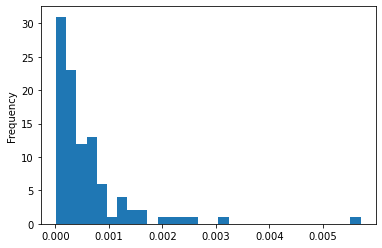

In [23]:
pd.Series(percentage_cancer_pixels).plot.hist(bins=30)

The class unbalance is dramatic, they are all under 0.5%. 99% of them are at an unbalance of 0.3%, and 75% under 0.07& percent. We definetely need weights or up/down sampling of some sort. 